In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ppscore as ps
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine = pd.read_csv("C:\\Users\\EDET\\Desktop\\programming\\dataset\\winequality-red.csv",delimiter=';')
white_wine = pd.read_csv('C:\\Users\\EDET\\Desktop\\programming\\dataset\\winequality-white.csv',delimiter=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
print(f'the length of the dataframe for red wine is {len(red_wine)}')
print(f'the length of the dataframe for white wine is {len(white_wine)}')

the length of the dataframe for red wine is 1599
the length of the dataframe for white wine is 4898


In [6]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [7]:
df = pd.concat([red_wine,white_wine])

In [8]:
def wine_descr(dataframe):
    print(f'the shape of the dataframe is: {dataframe.shape}')
    print(f'the length of the dataframe is: {len(dataframe)}')
    print(f'the size of the dataframe is: {dataframe.size}')

In [9]:
wine_descr(df)

the shape of the dataframe is: (6497, 13)
the length of the dataframe is: 6497
the size of the dataframe is: 84461


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [10]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
Sum = df.isnull().sum()
Percentage = (df.isnull().sum()/df.isnull().count())
#Percentage = (df.isnull().sum()/len(df))
pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [12]:
df.rename(columns={'fixed acidity':'fixed_acidity',
                   'volatile acidity':'volatile_acidity',
                   'citric acid':'citric_acid',
                   'residual sugar':'residual_sugar',
                   'free sulfur dioxide': 'free_sulfur_dioxide',
                   'total sulfur dioxide':'total_sulfur_dioxide'
                  },
          inplace=True)

In [17]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

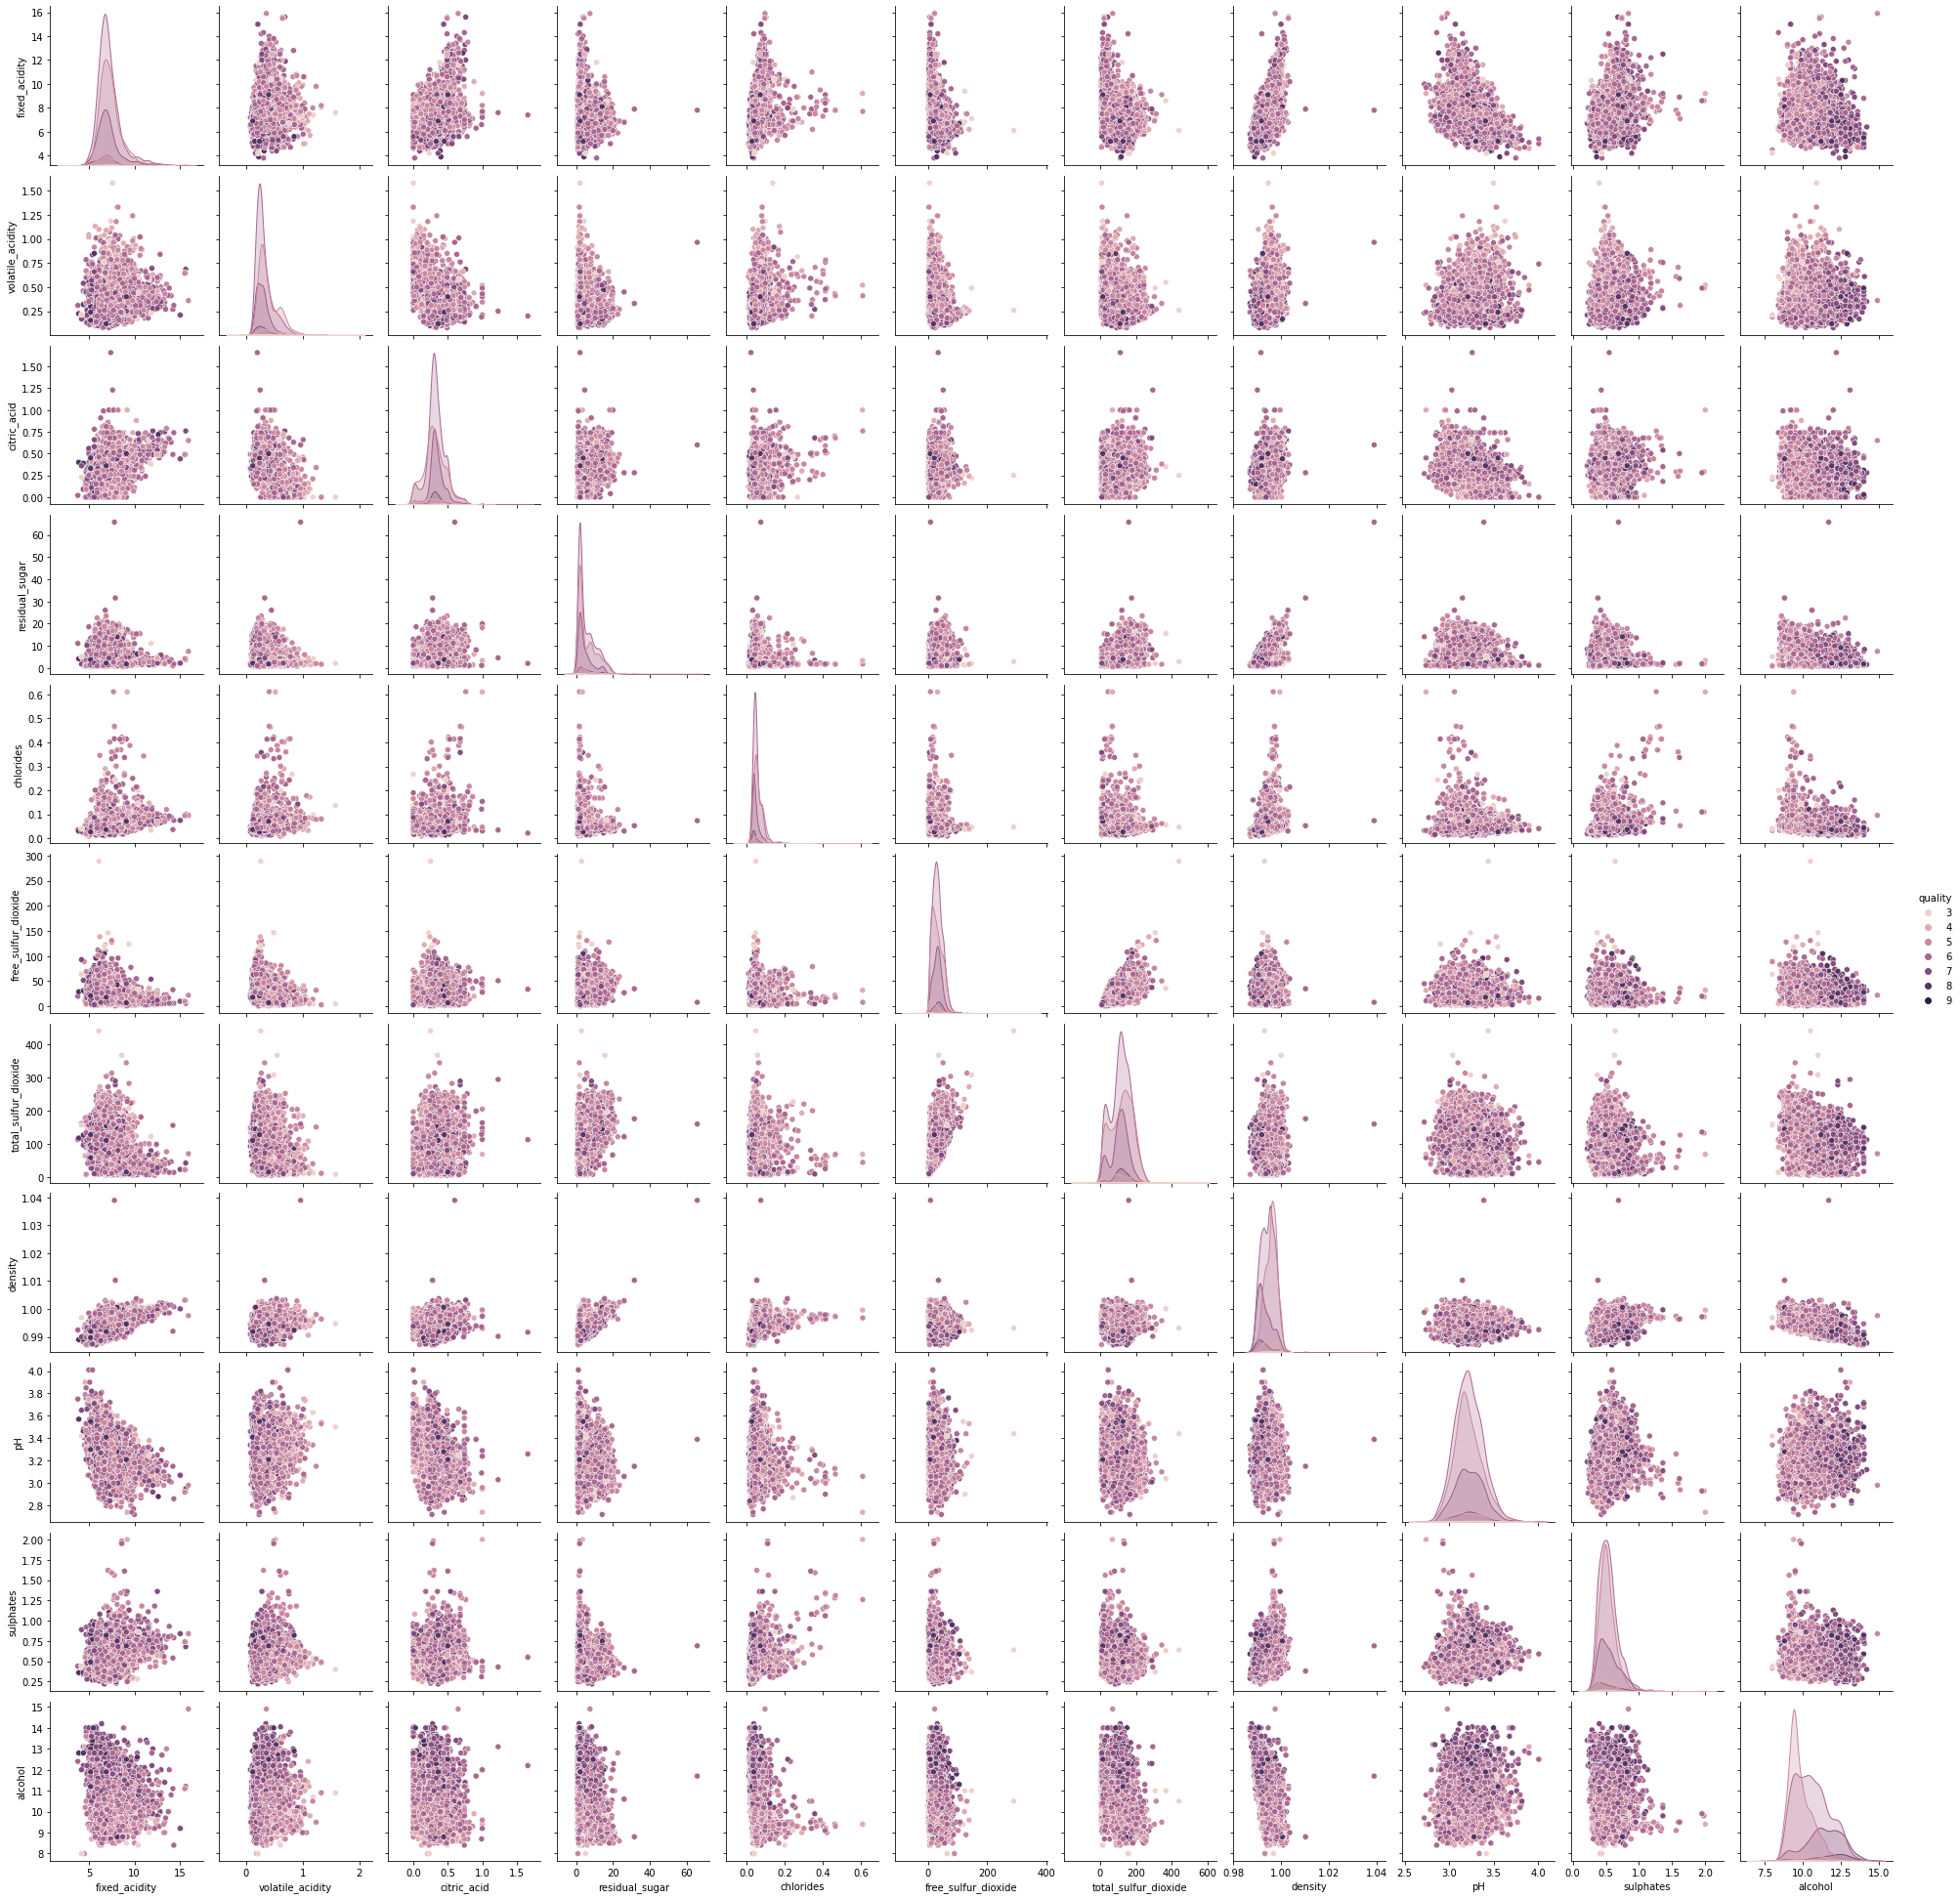

In [18]:
sns.pairplot(df, hue="quality")

In [19]:
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

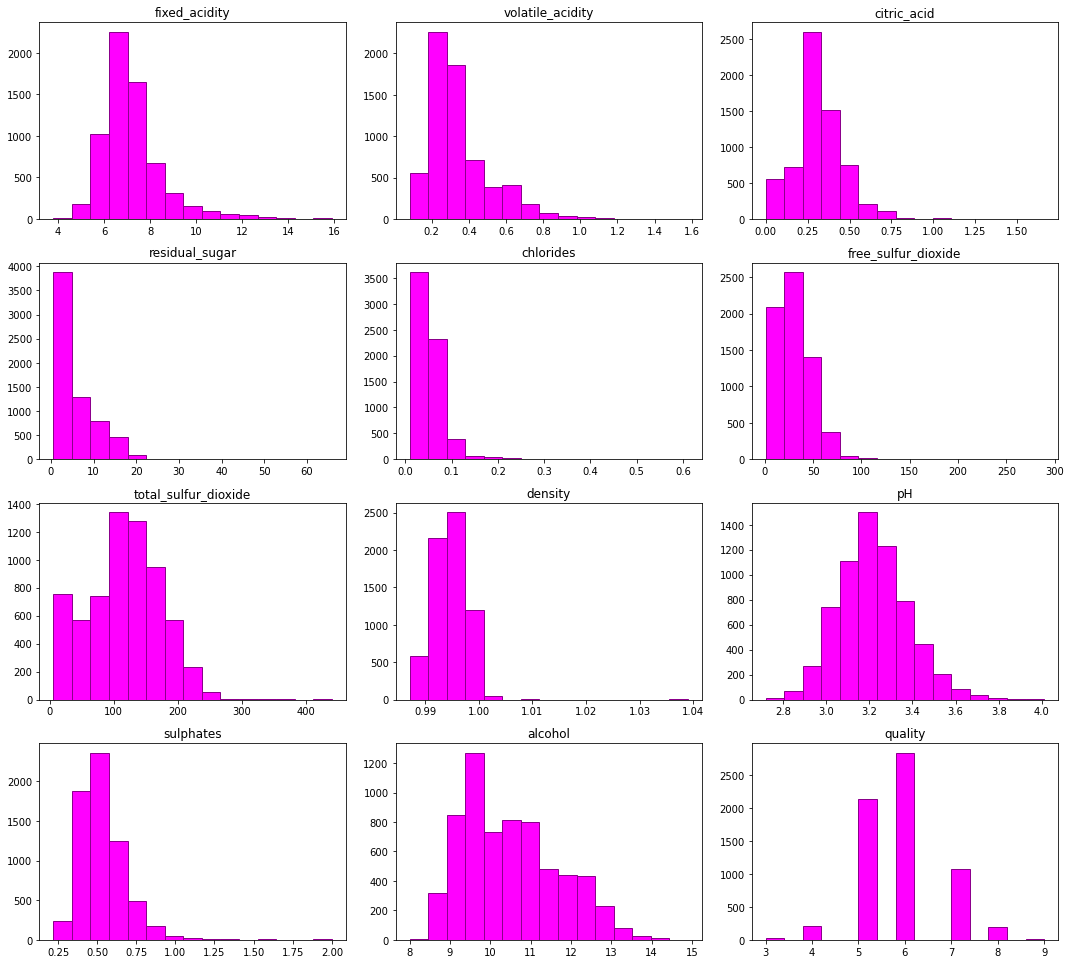

In [20]:
fig = df.hist(bins=15,
              color='fuchsia',
              edgecolor='darkmagenta',
              linewidth=1.0,
              xlabelsize=10,
              ylabelsize=10,
              yrot=0,
              figsize=(10,9),
              grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

Text(0.5, 0, 'correlation')

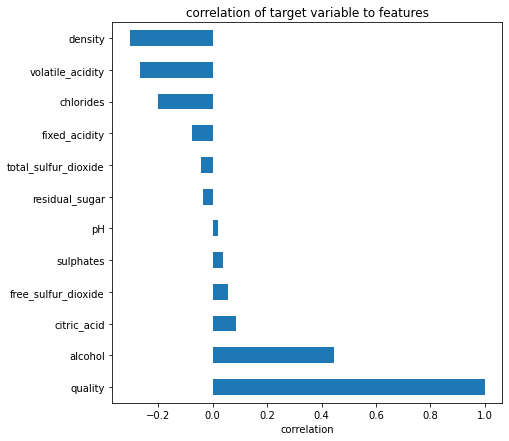

In [21]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False).plot(kind='barh',title='correlation of target variable to features',figsize=(7,7))
plt.xlabel('correlation')

In [23]:
predictive = ps.matrix(df)
predictive.sort_values(by='x',ascending=True).sample(20)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
89,total_sulfur_dioxide,quality,0.000000,regression,True,mean absolute error,0.638600,0.678410,DecisionTreeRegressor()
162,wine_type,total_sulfur_dioxide,0.298147,regression,True,mean absolute error,45.536800,31.960158,DecisionTreeRegressor()
160,wine_type,chlorides,0.263901,regression,True,mean absolute error,0.018433,0.013569,DecisionTreeRegressor()
76,free_sulfur_dioxide,quality,0.000000,regression,True,mean absolute error,0.638600,0.671481,DecisionTreeRegressor()
78,total_sulfur_dioxide,fixed_acidity,0.022451,regression,True,mean absolute error,0.884790,0.864925,DecisionTreeRegressor()
60,chlorides,pH,0.018654,regression,True,mean absolute error,0.125754,0.123408,DecisionTreeRegressor()
148,quality,free_sulfur_dioxide,0.003468,regression,True,mean absolute error,13.987200,13.938689,DecisionTreeRegressor()
146,quality,residual_sugar,0.000000,regression,True,mean absolute error,3.654360,3.915077,DecisionTreeRegressor()
119,sulphates,citric_acid,0.000000,regression,True,mean absolute error,0.104948,0.105837,DecisionTreeRegressor()
12,fixed_acidity,wine_type,0.401661,classification,True,weighted F1,0.655010,0.793579,DecisionTreeClassifier()


Text(0.5, 1.0, 'Correletion plot')

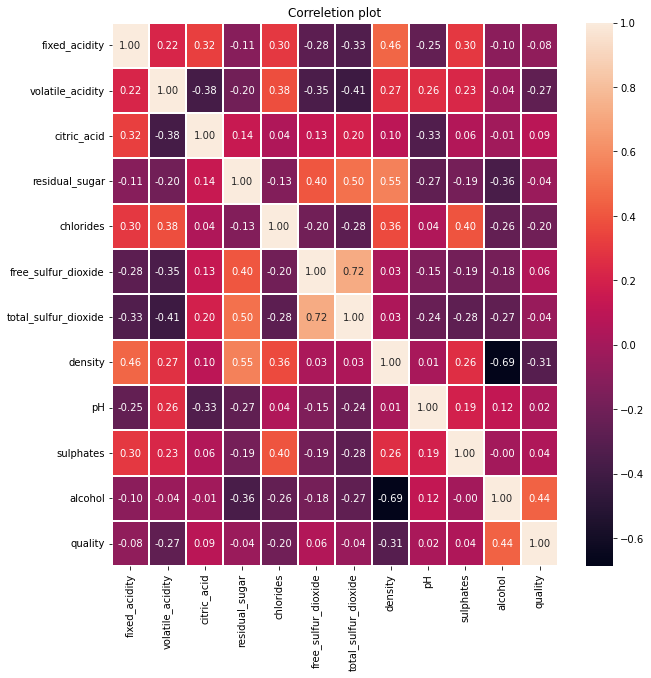

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f', linewidths=2)
plt.title('Correletion plot')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

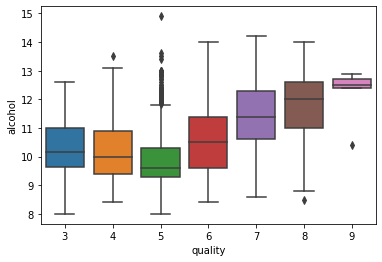

In [25]:
sns.boxplot(x='quality', y='alcohol', data = df)

In [13]:
df['wine_type'] = np.where(df['wine_type']=='white',0,1)

In [27]:
df['wine_type'].unique()

array([1, 0])

Text(0.5, 1.0, 'Wine quality')

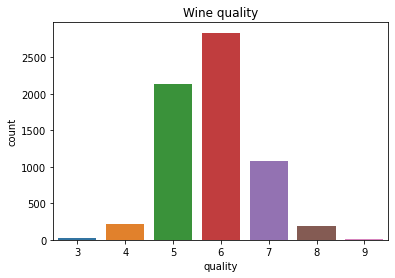

In [28]:
sns.countplot('quality', data=df).set_title("Wine quality")

In [14]:
df['quality_label'] = df['quality'].apply(lambda x: ('low' if x <= 5 else 'medium') if x <= 7 else 'high')

df['quality_label'] = pd.Categorical(df['quality_label'], categories=['low', 'medium', 'high'])

Text(0.5, 1.0, 'Wine quality labels')

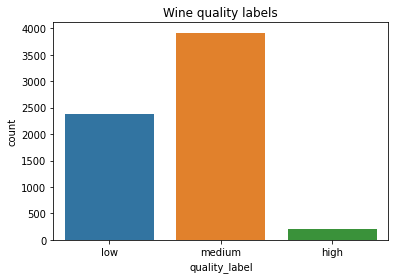

In [30]:
sns.countplot('quality_label', data=df).set_title("Wine quality labels")

In [15]:
df['quality_label'] = df['quality_label'].map({'low':0, 'medium':1, 'high':2})

Text(0.5, 1.0, 'Wine quality labels')

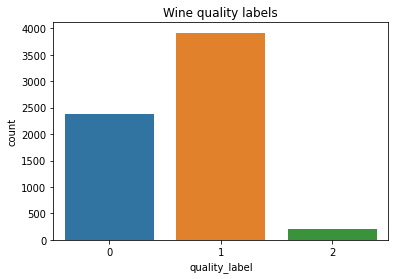

In [32]:
sns.countplot('quality_label', data=df).set_title("Wine quality labels")

In [16]:
%%time

from sklearn.model_selection import train_test_split, KFold, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Wall time: 2.2 s


In [38]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'quality_label'],
      dtype='object')

In [17]:
X = df.drop(columns=['quality','quality_label','wine_type'],axis=1)
y = np.ravel(df['quality_label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [53]:
%%time

models = []
models.append(('LogR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('LGBM',LGBMClassifier()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print('.........Loading result')
    print('=='*30)
    print(f'{names, cv_result.mean(), cv_result.std()}')
    print('\n')
    

.........Loading result
(['LogR'], 0.6765126906116403, 0.030046067578209164)


.........Loading result
(['LogR', 'KNN'], 0.6481952906722321, 0.02407647505628673)


.........Loading result
(['LogR', 'KNN', 'RFC'], 0.8004948328676743, 0.018983782093290477)


[12:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost

In [60]:
clf = XGBClassifier()
param_grid = {
 "n_estimators": [50, 100, 200], 
 'max_depth' : [2,5,7,9],
    'gamma' : [0.05,0.1,0.3,0.5],
    'min_child_weight' : [1, 3, 5, 7]
 }
model = GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     scoring="accuracy",
                     verbose=10,
                     n_jobs=-1,
                     cv=5)

In [61]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[13:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [19]:
"""xgb = XGBClassifier(base_score=0.5, 
              booster='gbtree', 
              colsample_bylevel=1,
              colsample_bynode=1, 
              colsample_bytree=1, 
              gamma=0.05, 
              gpu_id=-1,
              importance_type='gain', 
              interaction_constraints='',
              learning_rate=0.300000012, 
              max_delta_step=0, 
              max_depth=9,
              min_child_weight=1, 
              monotone_constraints='()',
              n_estimators=100, 
              n_jobs=4, 
              num_parallel_tree=1,
              objective='multi:softprob', 
              random_state=0, 
              reg_alpha=0,
              reg_lambda=1, 
              scale_pos_weight=None,
              subsample=1,
              tree_method='exact', 
              validate_parameters=1, 
              verbosity=None
             )
             """

In [20]:
#xgb.fit(X_train,y_train)

[14:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.05, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.05, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
final_model = model.best_estimator_

In [68]:
joblib.dump(final_model,'C:\\Users\\EDET\\Desktop\\programming\\DEployments\\wine_model.pkl')
print('........Dumping model')
print('model succesfully dumped')

........Dumping model
model succesfully dumped


Text(0.5, 1.0, 'Accuracy Score: 0.8')

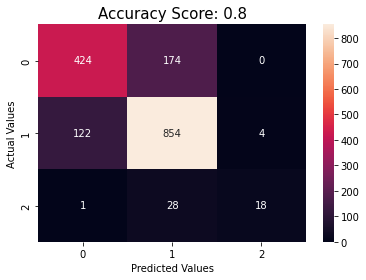

In [23]:
prediction = xgb.predict(X_test)
score = np.round(accuracy_score(y_test, prediction), 2)
confuse = confusion_matrix(y_test, prediction)
sns.heatmap(confuse, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       598
           1       0.81      0.87      0.84       980
           2       0.82      0.38      0.52        47

    accuracy                           0.80      1625
   macro avg       0.80      0.65      0.70      1625
weighted avg       0.80      0.80      0.79      1625

